In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

tr = 5125
te = 156
day = 10

c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\watso\appd

In [3]:
df = pd.read_csv("stock90_111.csv")
df

,date,Closing price
0,2001/1/2,83.5
1,2001/1/3,80.5
2,2001/1/4,85.0
3,2001/1/5,90.5
4,2001/1/8,89.5
...,...,...
5276,2022/5/23,528.0
5277,2022/5/24,520.0
5278,2022/5/25,524.0
5279,2022/5/26,514.0


In [4]:
train = df['Closing price']
train = train.iloc[0:tr]
train,train.shape

(0        83.5
 1        80.5
 2        85.0
 3        90.5
 4        89.5
         ...  
 5120    594.0
 5121    580.0
 5122    580.0
 5123    574.0
 5124    572.0
 Name: Closing price, Length: 5125, dtype: float64,
 (5125,))

In [5]:
test = df['Closing price']
test = test.iloc[tr:]
test,test.shape

(5125    572.0
 5126    571.0
 5127    580.0
 5128    575.0
 5129    575.0
         ...  
 5276    528.0
 5277    520.0
 5278    524.0
 5279    514.0
 5280    530.0
 Name: Closing price, Length: 156, dtype: float64,
 (156,))

In [6]:
train_set = np.array(train)
test_set = np.array(test)
type(train),type(train_set)

(pandas.core.series.Series, numpy.ndarray)

In [7]:
train_set = train_set.reshape(tr,-1)
test_set = test_set.reshape(te,-1)
train_set.shape,test_set.shape

((5125, 1), (156, 1))

In [8]:
test_set

array([[572.],
       [571.],
       [580.],
       [575.],
       [575.],
       [571.],
       [573.],
       [600.],
       [590.],
       [600.],
       [598.],
       [596.],
       [600.],
       [593.],
       [599.],
       [599.],
       [595.],
       [590.],
       [590.],
       [592.],
       [592.],
       [587.],
       [600.],
       [602.],
       [611.],
       [612.],
       [606.],
       [604.],
       [608.],
       [610.],
       [610.],
       [613.],
       [618.],
       [615.],
       [612.],
       [603.],
       [603.],
       [596.],
       [593.],
       [596.],
       [600.],
       [615.],
       [608.],
       [600.],
       [607.],
       [602.],
       [608.],
       [605.],
       [601.],
       [599.],
       [600.],
       [605.],
       [607.],
       [598.],
       [597.],
       [600.],
       [606.],
       [604.],
       [606.],
       [615.],
       [616.],
       [615.],
       [631.],
       [656.],
       [650.],
       [644.],
       [63

In [9]:
sc = MinMaxScaler(feature_range=(0, 1)) 
train_scaled = sc.fit_transform(train_set) 
test_scaled = sc.transform(test_set)
train_scaled,test_scaled

(array([[0.07514904],
        [0.07044242],
        [0.07750235],
        ...,
        [0.85409476],
        [0.84468152],
        [0.84154377]]),
 array([[0.84154377],
        [0.8399749 ],
        [0.85409476],
        [0.84625039],
        [0.84625039],
        [0.8399749 ],
        [0.84311265],
        [0.88547223],
        [0.8697835 ],
        [0.88547223],
        [0.88233448],
        [0.87919674],
        [0.88547223],
        [0.87449012],
        [0.88390336],
        [0.88390336],
        [0.87762786],
        [0.8697835 ],
        [0.8697835 ],
        [0.87292124],
        [0.87292124],
        [0.86507687],
        [0.88547223],
        [0.88860998],
        [0.90272984],
        [0.90429871],
        [0.89488547],
        [0.89174773],
        [0.89802322],
        [0.90116097],
        [0.90116097],
        [0.90586759],
        [0.91371195],
        [0.90900533],
        [0.90429871],
        [0.89017885],
        [0.89017885],
        [0.87919674],
        [0.874490

In [10]:
x_train = []
y_train = []
x_test = []
y_test = []

In [11]:
for i in range(day, len(train_scaled)):
    x_train.append(train_scaled[i - day:i, 0])
    y_train.append(train_scaled[i, 0])

In [12]:
x_train[20],y_train[20]

(array([0.08770003, 0.08613116, 0.08770003, 0.08848447, 0.09789771,
        0.09162222, 0.10181989, 0.09789771, 0.09475996, 0.09475996]),
 0.09711327267022277)

In [13]:
np.random.seed(5)
np.random.shuffle(x_train)
np.random.seed(5)
np.random.shuffle(y_train)
tf.random.set_random_seed(5)

In [14]:
x_train[20],y_train[20]

(array([0.03608409, 0.03577032, 0.03671164, 0.03796674, 0.0359272 ,
        0.03545654, 0.03639787, 0.03765297, 0.03812363, 0.03828051]),
 0.03702541575149044)

In [15]:
#len(x_train),x_test[0]

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [17]:
for i in range(day, len(test_set)):
    x_test.append(test_scaled[i - day:i, 0])
    y_test.append(test_scaled[i, 0])

In [18]:
x_test[20],y_test[20]

(array([0.87292124, 0.86507687, 0.88547223, 0.88860998, 0.90272984,
        0.90429871, 0.89488547, 0.89174773, 0.89802322, 0.90116097]),
 0.9011609664261062)

In [19]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],day,1))
x_test = np.reshape(x_test, (x_test.shape[0],day,1))
#x_train = sequence.pad_sequences(x_train, maxlen=5)
#x_test = sequence.pad_sequences(x_test, maxlen=5)

In [21]:
x_train.shape,x_test.shape

((5115, 10, 1), (146, 10, 1))

In [22]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 80,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,batch_size=32,epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5115/5115 [==============================] - 2s 485us/step - loss: 0.0201 - accuracy: 3.9101e-04
Epoch 2/100
5115/5115 [==============================] - 2s 372us/step - loss: 3.4359e-04 -

5115/5115 [==============================] - 2s 385us/step - loss: 8.0804e-05 - accuracy: 3.9101e-04
Epoch 61/100
5115/5115 [==============================] - 2s 375us/step - loss: 8.4363e-05 - accuracy: 3.9101e-04
Epoch 62/100
5115/5115 [==============================] - 2s 374us/step - loss: 8.2106e-05 - accuracy: 3.9101e-04
Epoch 63/100
5115/5115 [==============================] - 2s 375us/step - loss: 7.0825e-05 - accuracy: 3.9101e-04
Epoch 64/100
5115/5115 [==============================] - 2s 377us/step - loss: 8.7191e-05 - accuracy: 3.9101e-04
Epoch 65/100
5115/5115 [==============================] - 2s 377us/step - loss: 8.5537e-05 - accuracy: 3.9101e-04
Epoch 66/100
5115/5115 [==============================] - 2s 380us/step - loss: 7.4888e-05 - accuracy: 3.9101e-04
Epoch 67/100
5115/5115 [==============================] - 2s 378us/step - loss: 7.2357e-05 - accuracy: 3.9101e-04
Epoch 68/100
5115/5115 [==============================] - 2s 376us/step - loss: 7.8040e-05 - accuracy

In [24]:
predict_stock = model.predict(x_test)
predict_stock = sc.inverse_transform(predict_stock)

In [25]:
type(predict_stock)

numpy.ndarray

In [26]:
test_set[0:te-day].shape

(146, 1)

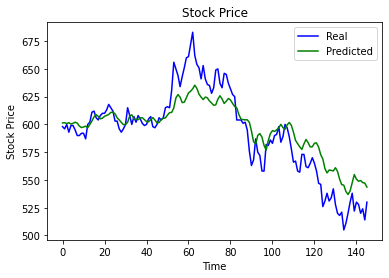

In [27]:
plt.plot(test_set[day:te], color = 'blue', label = 'Real')
plt.plot(predict_stock, color = 'green', label = 'Predicted')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
model.save('stock_20.h')